# Lennard-Jones potential

[Lennard-Jones potential](https://en.wikipedia.org/wiki/Lennard-Jones_potential) was proposed in 1924, and it is probably the most used example of interatomic potential for learning molecular dynamics. Here, we use a Jupyter notebook code cell to show Lennard-Jones potential. It contains a $\big(\frac{1}{r}\big)^{12}$ repulsive term and a $\big(\frac{1}{r}\big)^6 $ attractive term:

$$U(r) = 4 \varepsilon \bigg[\bigg( \frac{r_m}{r}\bigg)^{12} - \bigg( \frac{r_m}{r}\bigg)^6\bigg],$$

where $\varepsilon$ indicates the magnitude and $r_m$ indicates a reference radius.

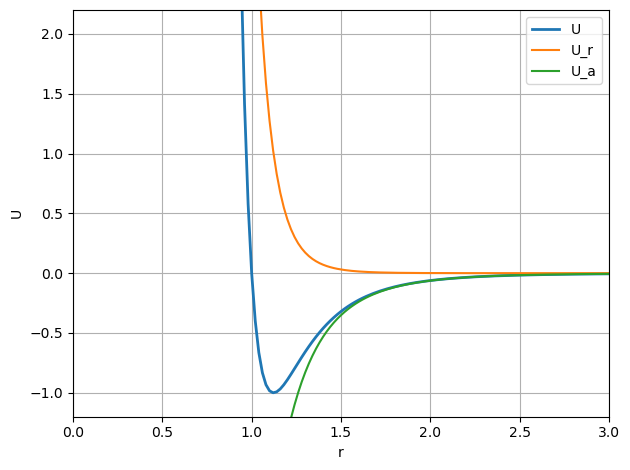

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# parameters
eps = 1
r0 = 1

# data
r = np.linspace(1e-4, 4, 201)

# U_rep and U_att

Ur = 4*eps*((1/r)**12)
Ua = 4*eps*(-(1/r)**6)

U = Ur + Ua

# plot
fig, ax = plt.subplots()
ax.plot(r, U, label='U', linewidth=2)
ax.plot(r, Ur, label='U_r', linestyle='-')
ax.plot(r, Ua, label='U_a', linestyle='-')
ax.set_xlim(0,3)
ax.set_ylim(-1.2,2.2)
ax.set_xlabel('r'); ax.set_ylabel('U')

ax.grid(True); ax.legend()
fig.tight_layout()
plt.show()

The interatomic force is calculated as the derivative of the potentenail.

$$f(r) = -\frac{d U(r)}{dr} = -4*\varepsilon \bigg[ -12 \bigg(\frac{r_m}{r}\bigg)^{13} + 6 \bigg(\frac{r_m}{r}\bigg)^{7}\bigg] .$$

The equilibrium distance between the two atoms is where

$$f(r_0) = 0 ~~\Longrightarrow~~ \bigg[ -12 \bigg(\frac{r_m}{r}\bigg)^{13} + 6 \bigg(\frac{r_m}{r}\bigg)^{7}\bigg]=0 ~~\Longrightarrow~~r_0 = 1.22462 ~r_m.$$

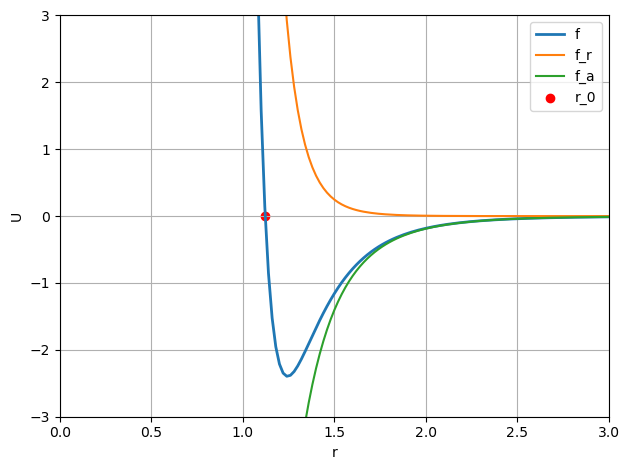

In [4]:
# f_rep and f_att

fr = -4*eps*(-12*(1/r)**13)
fa = -4*eps*(6*(1/r)**7)

f = fr + fa

# plot
fig, ax = plt.subplots()
ax.plot(r, f, label='f', linewidth=2)
ax.plot(r, fr, label='f_r', linestyle='-')
ax.plot(r, fa, label='f_a', linestyle='-')
ax.set_xlim(0,3)
ax.set_ylim(-3,3)
ax.set_xlabel('r'); ax.set_ylabel('U')

r0 = 1.122462
ax.scatter([r0],[0],  label='r_0', c='r')
ax.grid(True); ax.legend()
fig.tight_layout()
plt.show()

### Cut-off radius: 

The force field decays rapidly. For example, at $r = 2.5 \cdot r_0$, the interatomic potential is only 0.0082 times the depth of the energy well. Futher away, say at $r=5 \cdot r_0$, the potential is only 0.00013 times the well value. It decays to roughly 1/10000 of the well value. Practically, the force field roughly affects a range over a couple of equilibrium atomic distances.

In [6]:
factors = [2.5, 5]

for factor in factors:
    r_cut = factor * r0 
    U_cut = 4*eps*((1.0/r_cut)**12 - (1.0/r_cut)**6)
    print(f"U(r) at r = {factor}*r0 (r = {r_cut:.3g}) ==> {U_cut:.6g}")


U(r) at r = 2.5*r0 (r = 2.81) ==> -0.00817522
U(r) at r = 5*r0 (r = 5.61) ==> -0.000127996
